In [1]:
import pandas as pd                                # importing pandas for working with dataframes
import numpy as np                                 # importing Numpy for mathematical operations using arrays
import warnings
warnings.filterwarnings("ignore")                  # to let the warnings library to ignore any warnings generated in the code
import matplotlib.pyplot as plt                    # importing matplotlib for making scatter plots 
from scipy.stats import norm                       # to use the probability distribution function in statistical analysis later in the assignment
from pandas.plotting import autocorrelation_plot   # importing autocorrelation_plot" function to visualize the autocorrelation of time series data
from statsmodels.tsa.stattools import adfuller     # importing ADF do find if the data is mean-reversion or mean-aversion
from statsmodels.tsa.arima.model import ARIMA      # importing to fit the time series data to the ARIMA model
import statistics

                     Wind Generation
datetime                            
2014-01-01 00:00:00           1190.1
2014-01-01 01:00:00           1186.6
2014-01-01 02:00:00           1174.3
2014-01-01 03:00:00           1146.7
2014-01-01 04:00:00           1156.8
...                              ...
2014-12-31 19:00:00            996.8
2014-12-31 20:00:00           1031.8
2014-12-31 21:00:00           1218.0
2014-12-31 22:00:00           1312.1
2014-12-31 23:00:00           1424.8

[8760 rows x 1 columns]


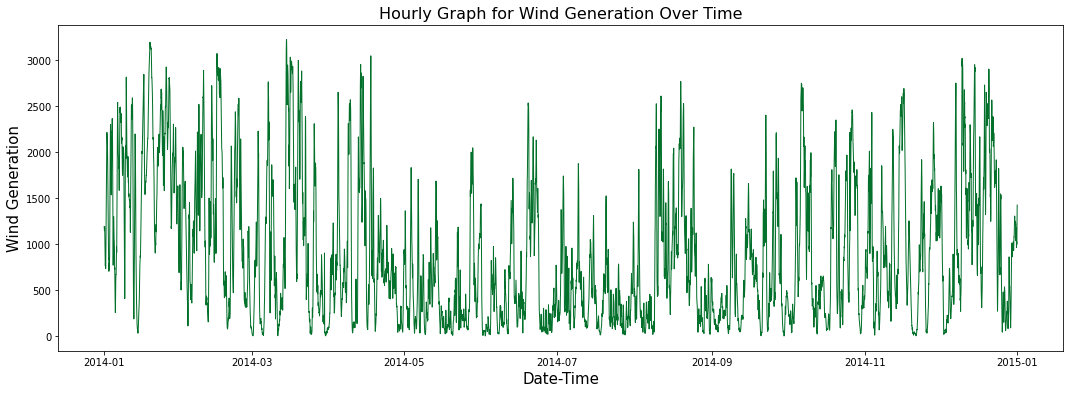

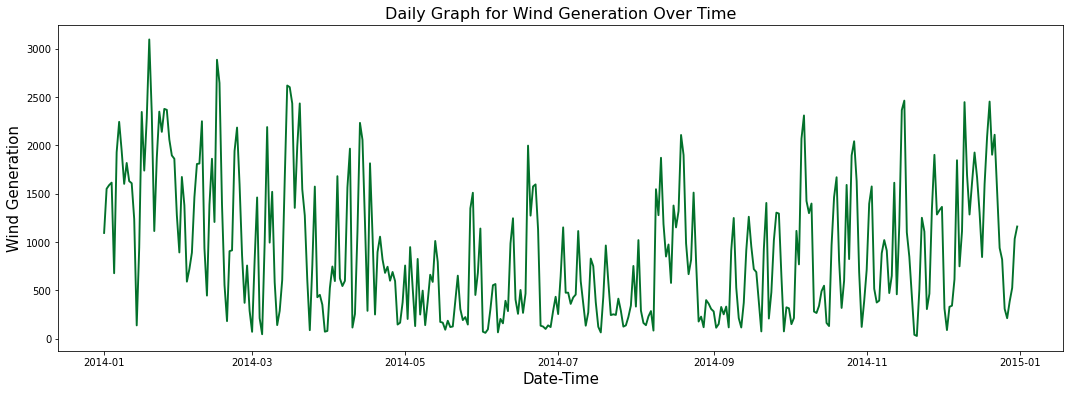

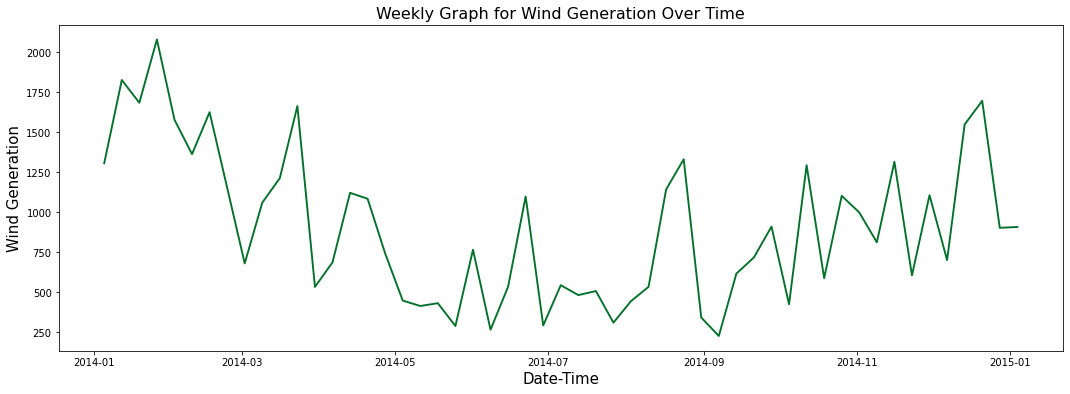

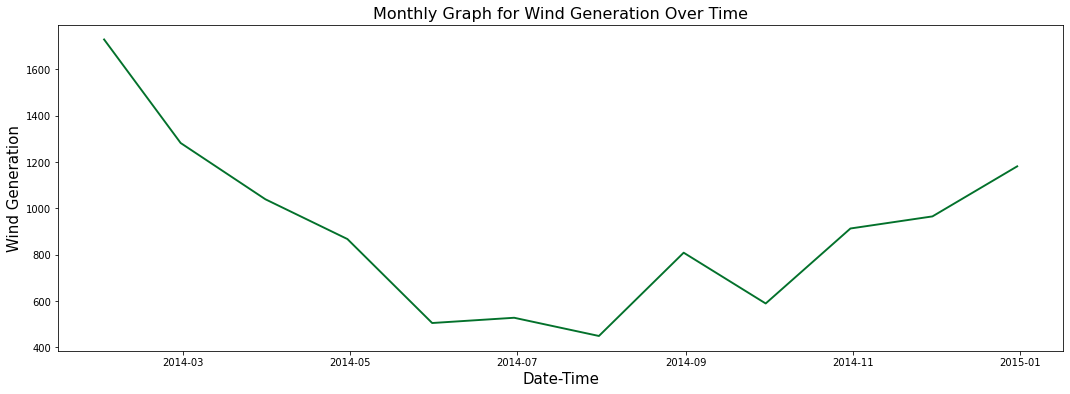

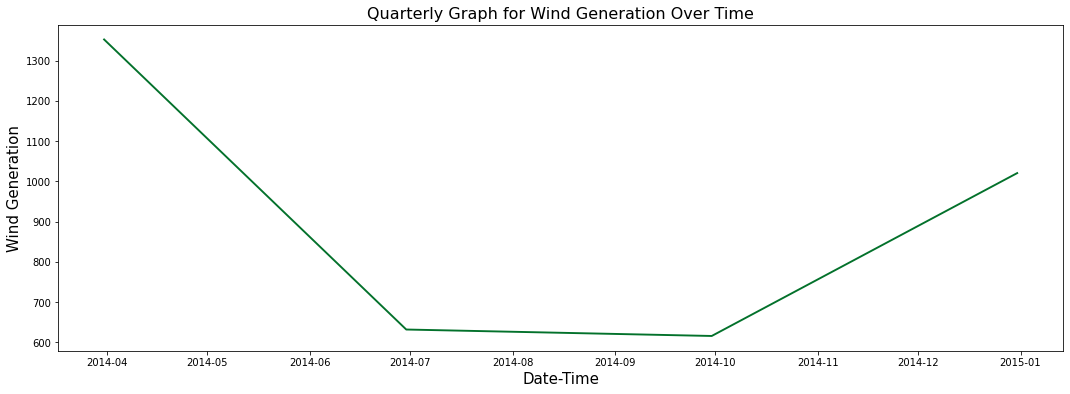

In [2]:
wind_gen = pd.read_csv('WindGeneration.csv')
wind_gen.fillna(wind_gen.mean(), inplace=True)
wind_gen_copy = wind_gen.copy()
wind_gen_q4 = wind_gen.copy()

# Here we are loading the csv data using pandas dataframe, after that we are 
# filling the NAN values by the column mean. Two copies of the data have been 
# made for using them further in the assignment

wind_gen['Date'] = pd.to_datetime(wind_gen['Date'], format='%d/%m/%Y')

# Here we are creating a new column in the "wind_gen" DataFrame called "Date" by 
# converting the values in the "Date" column from string to datetime format using 
# the "to_datetime" function from the "pandas" library. The "format" argument is
# used to specify the format of the original date strings

wind_gen['datetime'] = wind_gen.apply(lambda row: row['Date'] + pd.Timedelta(hours = row['Time']), axis=1)

# Here we are creating a column called "datetime" in the "wind_gen" DataFrame by combining 
# the values from the "Date" and "Time" columns. The lambda function takes a row as input and 
# adds the value of "Time" in hours to the "Date" value and hence we get the result as a combined datetime value

wind_gen.drop(['Date', 'Time'], axis=1, inplace=True)

# Here we are using the "drop" method to remove the columns from our dataframe.
# The "axis=1" argument specifies that we are dropping columns and the "inplace=True" 
# argument specifies that the changes would be made in the original dataframe

wind_gen.set_index('datetime', inplace=True)

# Here we are setting the datetime column as our index so that it can be used to select and manipulate the data based on time

wind_gen.index = wind_gen.index + pd.Timedelta(hours=-1)
print(wind_gen)

# Shifting the date index by 1 hour and printing it to see how does the data looks

daily_mean = wind_gen.resample('D').mean()
# print("Daily DataFrame",daily_mean, daily_mean.shape)

# Here we are creating a new DataFrame called "daily_mean" by resampling the "wind_gen" DataFrame 
# to daily frequency using the "resample" method. The "D" argument means that resampling is done
# at the daily frequency, and the ".mean()" method calculates the mean value of each resampled group

weekly_mean = wind_gen.resample('W').mean()
# print("Weekly DataFrame", weekly_mean, weekly_mean.shape)

# Similarly here we are resampling the data on the weekly basis

monthly_mean = wind_gen.resample('M').mean()
# print("Monthly DataFrame", monthly_mean, monthly_mean.shape)

# here we are resampling the data on the monthly basis

quarterly_mean = wind_gen.resample('Q').mean()
# print("Quarterly DataFrame", quarterly_mean, quarterly_mean.shape)

# here we are resampling the data on the quarterly basis

plt.figure(figsize=(18,6))
plt.plot(wind_gen['Wind Generation'], linewidth=1, c = "#03712B")
plt.xlabel('Date-Time', fontsize=15)
plt.ylabel('Wind Generation', fontsize=15)
plt.title('Hourly Graph for Wind Generation Over Time', fontsize=16)
plt.show()

# Here we are plotting the hourly plot of wind generation over time, we have set 
# the figure size and used the hexagonal color value and set the labels for axis

plt.figure(figsize=(18,6))
plt.plot(daily_mean['Wind Generation'], linewidth=1.9, c = "#03712B")
plt.xlabel('Date-Time', fontsize = 15)
plt.ylabel('Wind Generation', fontsize = 15)
plt.title('Daily Graph for Wind Generation Over Time', fontsize=16)
plt.show()

# Here we are plotting the daily plot of wind generation over time, we have set 
# the figure size and used the hexagonal color value and set the labels for axis

plt.figure(figsize=(18,6))
plt.plot(weekly_mean['Wind Generation'], linewidth=1.9, c = "#03712B")
plt.xlabel('Date-Time', fontsize=15)
plt.ylabel('Wind Generation', fontsize=15)
plt.title('Weekly Graph for Wind Generation Over Time', fontsize=16)
plt.show()

# Here we are plotting the weekly plot of wind generation over time, we have set 
# the figure size and used the hexagonal color value and set the labels for axis

plt.figure(figsize=(18,6))
plt.plot(monthly_mean['Wind Generation'], linewidth=1.9, c = "#03712B")
plt.xlabel('Date-Time', fontsize=15)
plt.ylabel('Wind Generation', fontsize=15)
plt.title('Monthly Graph for Wind Generation Over Time', fontsize=16)
plt.show()

# Here we are plotting the monthly plot of wind generation over time, we have set 
# the figure size and used the hexagonal color value and set the labels for axis

plt.figure(figsize=(18,6))
plt.plot(quarterly_mean['Wind Generation'], linewidth=1.9, c = "#03712B")
plt.xlabel('Date-Time', fontsize=15)
plt.ylabel('Wind Generation', fontsize=15)
plt.title('Quarterly Graph for Wind Generation Over Time', fontsize=16)
plt.show()

# Here we are plotting the quarterly plot of wind generation over time, we have set 
# the figure size and used the hexagonal color value and set the labels for axis

## Evidence of annual seasonality - 

1352.7217070748393


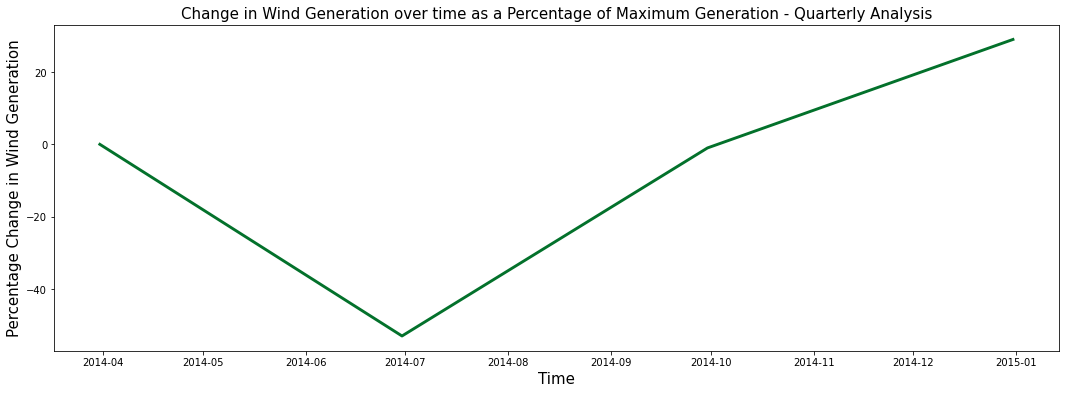

In [3]:
max_wind_gen = quarterly_mean['Wind Generation'].max()
print(max_wind_gen)

# here we  are calculating the maximum value of wind generation in the quaterly data frame
# this value is used in calculation of the percentage of maximum wind generation

quarterly_mean['Percentage Change'] = 0
for i in range(quarterly_mean.shape[0]-1):
  quarterly_mean['Percentage Change'][i+1] = 100 * ((quarterly_mean['Wind Generation'][i+1] - quarterly_mean['Wind Generation'][i]) / max_wind_gen)
# print(quarterly_mean)

# Here we create a column 'percentage change' in the data frame quaterly mean and set all the row values to 0
# Looping over every row, we subtract the original value of the row by the value just after it, i.e. by the value for the next quarter
# then % change is calculated and we are storing these values in the new column which we created in the dataframe

plt.figure(figsize=(18,6))
plt.plot(quarterly_mean.index, quarterly_mean['Percentage Change'], linewidth=2.9, c = "#03712B")
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Percentage Change in Wind Generation', fontsize = 15)
plt.title('Change in Wind Generation over time as a Percentage of Maximum Generation - Quarterly Analysis', fontsize = 15)
plt.show()

# Here we are plotting the change in wind generation as a percentage of maximum generation for the quarterly data
# We have set the axis titles, plot title and used the hexagonal color values

1729.6896505376346


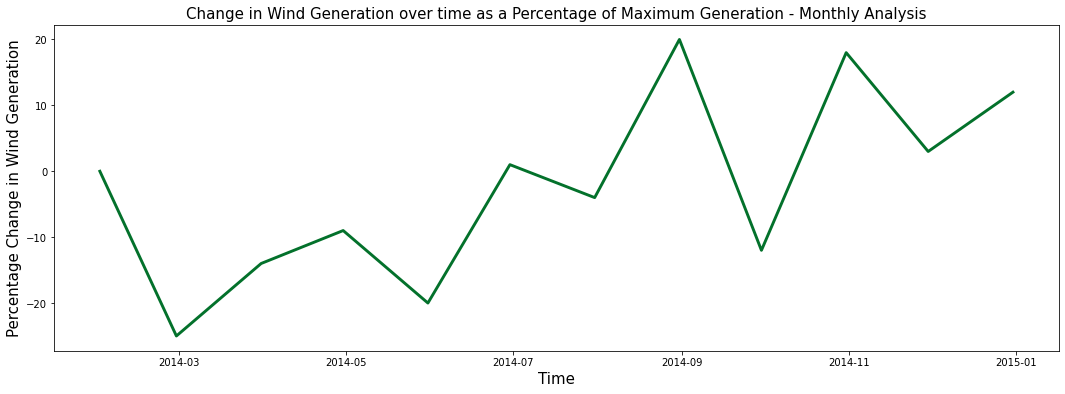

In [4]:
max_wind_gen = monthly_mean['Wind Generation'].max()
print(max_wind_gen)

# here we  are calculating the maximum value of wind generation in the monthly data frame
# this value is used in calculation of the percentage of maximum wind generation

monthly_mean['Percentage Change'] = 0
for i in range(monthly_mean.shape[0]-1):
  monthly_mean['Percentage Change'][i+1] = 100 * ((monthly_mean['Wind Generation'][i+1] - monthly_mean['Wind Generation'][i]) / max_wind_gen)
# print(monthly_mean)

# Here we create a column 'percentage change' in the data frame monthly mean and set all the row values to 0
# Looping over every row, we subtract the original value of the row by the value just after it, i.e. by the value for the next month
# then % change is calculated and we are storing these values in the new column which we created in the dataframe

plt.figure(figsize=(18,6))
plt.plot(monthly_mean.index, monthly_mean['Percentage Change'], linewidth = 2.9, c = "#03712B")
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Percentage Change in Wind Generation', fontsize = 15)
plt.title('Change in Wind Generation over time as a Percentage of Maximum Generation - Monthly Analysis', fontsize = 15)
plt.show()

# Here we are plotting the change in wind generation as a percentage of maximum generation for the monthly data
# We have set the axis titles, plot title and used the hexagonal color values

2078.4291666666663


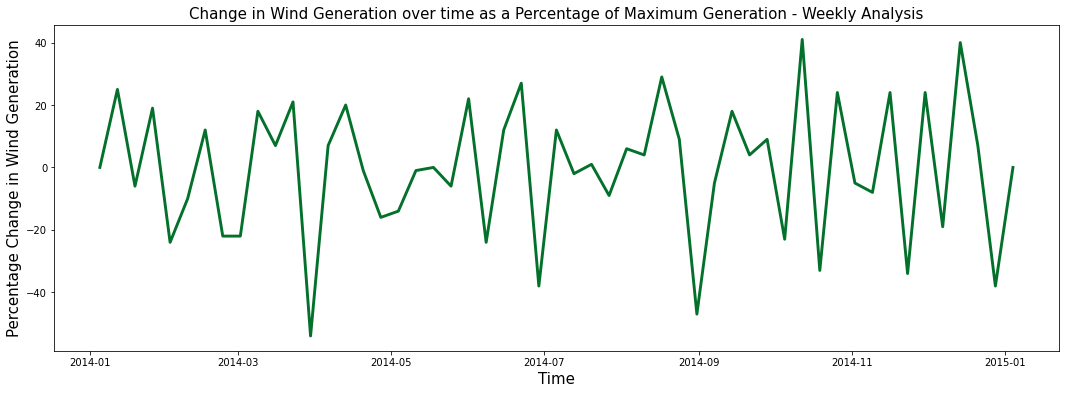

In [5]:
max_wind_gen = weekly_mean['Wind Generation'].max()
print(max_wind_gen)

# here we  are calculating the maximum value of wind generation in the weekly data frame
# this value is used in calculation of the percentage of maximum wind generation

weekly_mean['Percentage Change'] = 0
for i in range(weekly_mean.shape[0]-1):
  weekly_mean['Percentage Change'][i+1] = 100 * ((weekly_mean['Wind Generation'][i+1] - weekly_mean['Wind Generation'][i]) / max_wind_gen)
# print(weekly_mean)

# Here we create a column 'percentage change' in the data frame weekly mean and set all the row values to 0
# Looping over every row, we subtract the original value of the row by the value just after it, i.e. by the value for the next week
# then % change is calculated and we are storing these values in the new column which we created in the dataframe

plt.figure(figsize=(18,6))
plt.plot(weekly_mean.index, weekly_mean['Percentage Change'], linewidth=2.9, c = "#03712B")
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Percentage Change in Wind Generation', fontsize = 15)
plt.title('Change in Wind Generation over time as a Percentage of Maximum Generation - Weekly Analysis', fontsize = 15)
plt.show()

# Here we are plotting the change in wind generation as a percentage of maximum generation for the weekly data
# We have set the axis titles, plot title and used the hexagonal color values

3095.2708333333335


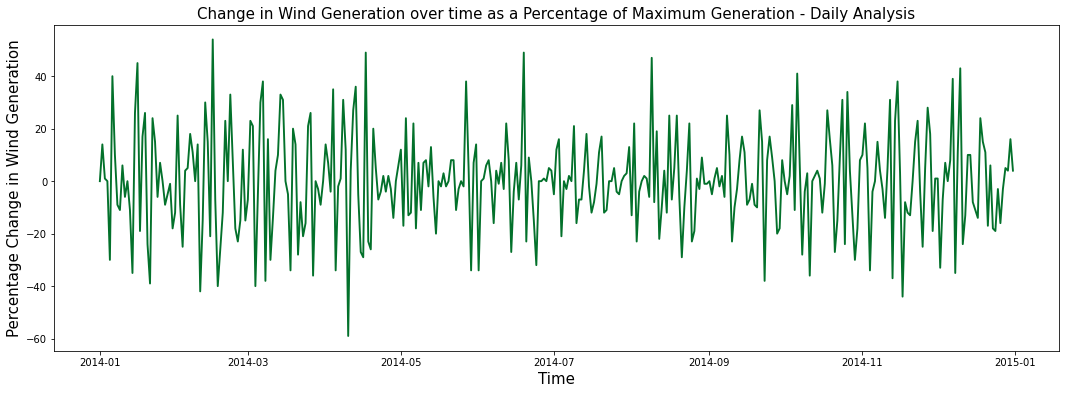

In [6]:
max_wind_gen = daily_mean['Wind Generation'].max()
print(max_wind_gen)

# here we  are calculating the maximum value of wind generation in the daily data frame
# this value is used in calculation of the percentage of maximum wind generation

daily_mean['Percentage Change'] = 0
for i in range(daily_mean.shape[0]-1):
  daily_mean['Percentage Change'][i+1] = 100 * ((daily_mean['Wind Generation'][i+1] - daily_mean['Wind Generation'][i]) / max_wind_gen)
# print(daily_mean)

# Here we create a column 'percentage change' in the data frame daily mean and set all the row values to 0
# Looping over every row, we subtract the original value of the row by the value just after it, i.e. by the value for the next day
# then % change is calculated and we are storing these values in the new column which we created in the dataframe

plt.figure(figsize=(18,6))
plt.plot(daily_mean.index, daily_mean['Percentage Change'], linewidth=1.9, c = "#03712B")
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Percentage Change in Wind Generation', fontsize = 15)
plt.title('Change in Wind Generation over time as a Percentage of Maximum Generation - Daily Analysis', fontsize = 15)
plt.show()

# Here we are plotting the change in wind generation as a percentage of maximum generation for the daily data
# We have set the axis titles, plot title and used the hexagonal color values

3225.4


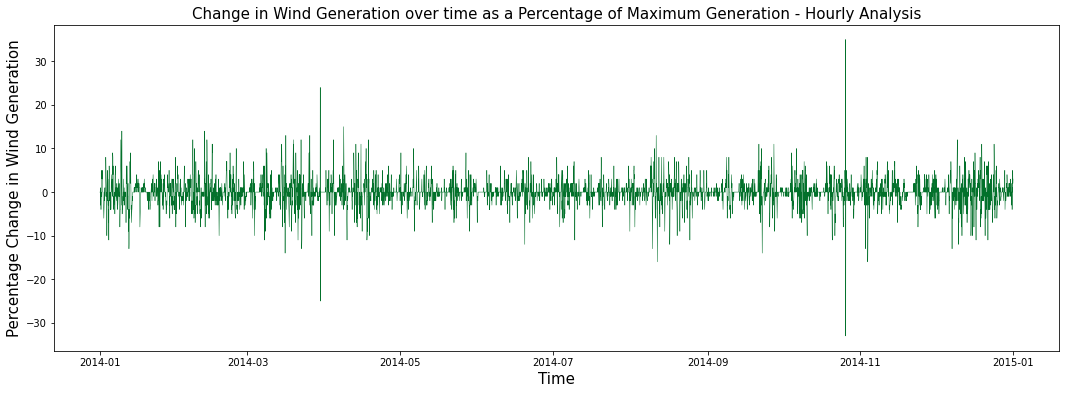

In [18]:
max_wind_gen = wind_gen['Wind Generation'].max()
print(max_wind_gen)

# here we  are calculating the maximum value of wind generation in the hourly data frame
# this value is used in calculation of the percentage of maximum wind generation

wind_gen['Percentage Change'] = 0
for i in range(wind_gen.shape[0]-1):
  wind_gen['Percentage Change'][i+1] = 100 * ((wind_gen['Wind Generation'][i+1] - wind_gen['Wind Generation'][i]) / max_wind_gen)
# print(wind_gen)

# Here we create a column 'percentage change' in the data frame hourly mean and set all the row values to 0
# Looping over every row, we subtract the original value of the row by the value just after it, i.e. by the value for the next hour
# then % change is calculated and we are storing these values in the new column which we created in the dataframe

plt.figure(figsize=(18,6))
plt.plot(wind_gen.index, wind_gen['Percentage Change'], linewidth=0.5, c = "#03712B")
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Percentage Change in Wind Generation', fontsize = 15)
plt.title('Change in Wind Generation over time as a Percentage of Maximum Generation - Hourly Analysis', fontsize = 15)
plt.show()

# Here we are plotting the change in wind generation as a percentage of maximum generation for the hourly data
# We have set the axis titles, plot title and used the hexagonal color values

## Evidence of annual seasonality - 

Text(0.5, 1.0, 'Empirical CDF of Positive and Negative Ramps in Wind Power Generation')

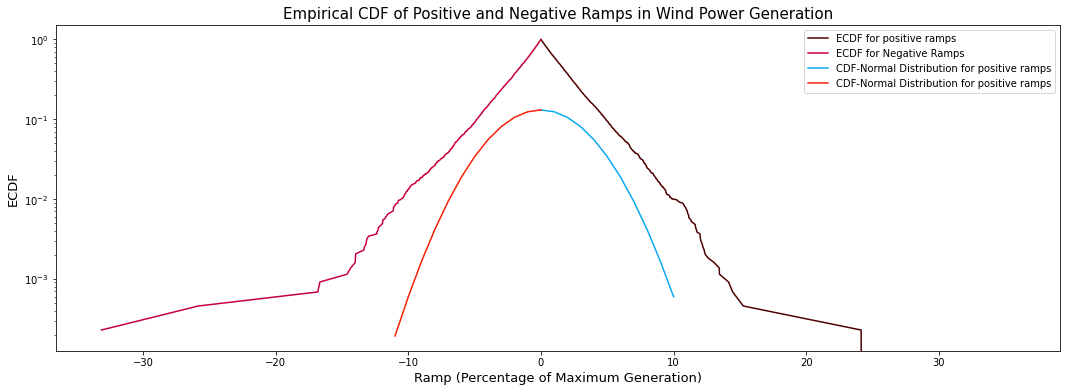

In [8]:
max_wind_gen = wind_gen_copy['Wind Generation'].max()

# Here we are calculating the maximum value of the wind power generation from the hourly data

ramps = 100 * (wind_gen_copy['Wind Generation'].shift(-1) - wind_gen_copy['Wind Generation']) / max_wind_gen
# display(ramps)

# Here we are creating a new variable "ramps" and assign it the result of a calculation performed on the
# "Wind Generation" column of the "wind_gen_copy" DataFrame. We compute the percentage change in wind 
# generation values between consecutive time steps and divide by the maximum wind generation value. We 
# have shifted al the values down by one row to perform the substraction

positive_ramps = ramps[ramps > 0]
negative_ramps = ramps[ramps <= 0]

# Here we are splitting the ramps into positive and negative ramps based on their sign

r = 100*((wind_gen_copy['Wind Generation'].diff())/max_wind_gen)
# print(r)

# Here we have defined the value of r as given in our question

def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

p_x , p_y = ecdf(positive_ramps)
n_x , n_y = ecdf(negative_ramps)

# Here we have passed the positive and negative into our fucntion ecdf and we have got the x and y values for the positive and the negative ramps
sd = statistics.stdev(r.dropna())
x1 = range(0, 11)
x2 = range(-11, 1)

# Here we have defined the range for plotting the normal distribution for the positive and the negative values

plt.figure(figsize=(18,6))
plt.plot(p_x, 1- p_y, label = 'ECDF for positive ramps', c = "#4E0000")
plt.plot(n_x, n_y, label = 'ECDF for Negative Ramps',  c = "#C70039" )
plt.plot(x1, norm.pdf(x1 , 0, sd), label = 'CDF-Normal Distribution for positive ramps', c = "#09A8F1" )
plt.plot(x2, norm.pdf(x2 , 0, sd), label = 'CDF-Normal Distribution for positive ramps', c = "#F71F05")
plt.legend()
plt.xlabel('Ramp (Percentage of Maximum Generation)', fontsize = 13)
plt.ylabel('ECDF', fontsize = 13)
plt.yscale('log')
plt.title('Empirical CDF of Positive and Negative Ramps in Wind Power Generation', fontsize = 15)

# Here we have plotted 4 graphs. One with the positive ramp ECDF, another with the negative ramp ECDF and two with the probability distribution 
# norm.pdf(x1, 0, sd) returns the probability density function values for the standard normal distribution with mean 0 and standard deviation
# sd evaluated at the points in the x1 range.

## Is the normal distribution a good model for wind power extremes?
According to me, the normal distribution is a good model for the wind power because we can see in the plot that the positive and the negative ramps follow a similar trend as followed by the normal distribution. It increases in the middle and decreases as we go away from the mean. However, we can also perform an Anderson-Darling test to see if the normal distribution is good for wind generation or is there any other distribution that is a better fit for this question. 

But as asked in the question, the model does not perform well for the extremes because we can see that at the extremes the grapg of normal distribution and that of the positive and the negative ramps is not close and is different in shape and structure

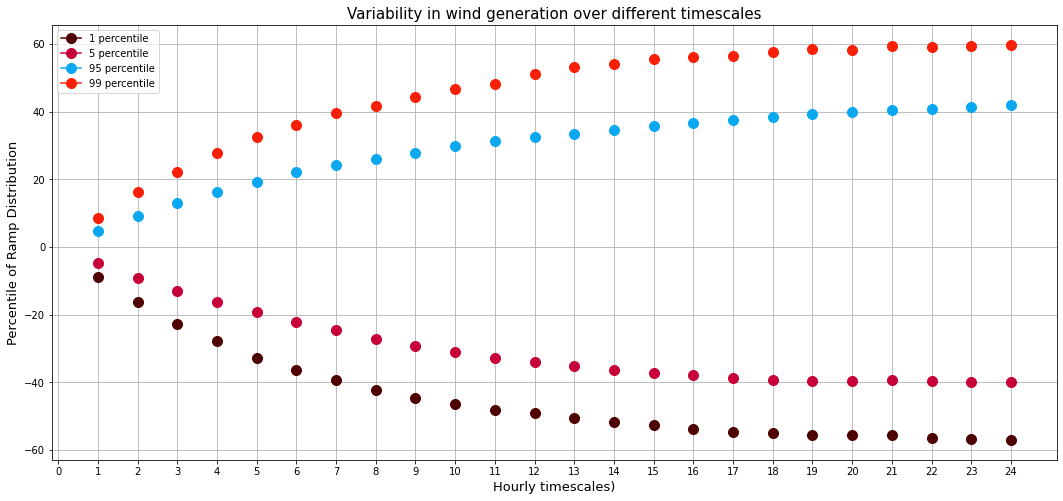

In [54]:
max_wind_genq4 = wind_gen_q4['Wind Generation'].max()

# Here we have find the maximum of the wind generation value, this will be used to find the ramps 

d_values = list(range(1, 25))
# Here we have defined the d values from 1 to 24, each hour of the day

percentiles = {d: [] for d in d_values}
# Here we have defined a dictionary to store the percentiles for each d value. So, each d value will have 4 percentile values

plt.figure(figsize=(18,8))
for d in range(1,25):
  ramps = 100 * (wind_gen_q4['Wind Generation'].shift(-d) - wind_gen_q4['Wind Generation']) / max_wind_genq4
  ramps = ramps.dropna()
  perc1 = ramps.quantile(0.01)
  plt.plot(d, perc1, marker = "o", markersize = 10, color = "#4E0000")
  perc2 = ramps.quantile(0.05)
  plt.plot(d, perc2,marker = "o",markersize = 10, color = "#C70039")
  perc3 = ramps.quantile(0.95)
  plt.plot(d, perc3,marker = "o",markersize = 10, color = "#09A8F1")
  perc4 = ramps.quantile(0.99)
  plt.plot(d, perc4, marker = "o",markersize = 10, color  = "#F71F05")
  # print(f"For d = {d}, the percentiles are ", perc1, perc2, perc3, perc4)

plt.xlabel('Hourly timescales)',fontsize = 13)
plt.ylabel('Percentile of Ramp Distribution', fontsize = 13)
plt.title('Variability in wind generation over different timescales', fontsize = 15)
xticks = np.arange(0, 25, 1)
plt.xticks(xticks)
plt.legend(["1 percentile", "5 percentile","95 percentile", "99 percentile"])
plt.grid()
plt.show()

# Here we are plotting the percentiles for each d value which are stored in our dictionary
# We have given the title and set the marker shape and size. To show each hour on the x axis we have used xticks 

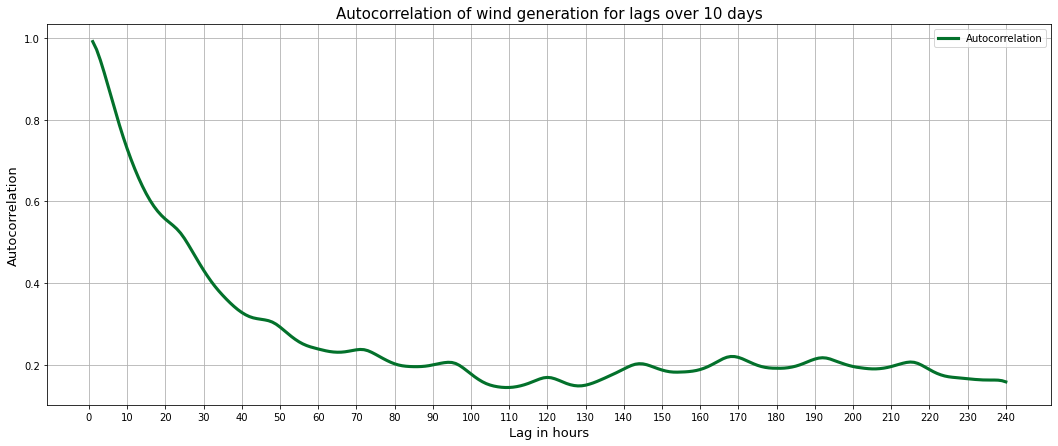

In [22]:
lags = range(1, 241)
autocorrs = [wind_gen_q4['Wind Generation'].autocorr(lag = i) for i in lags]
# print(autocorrs)

# Here  we are calculating the autocorrelation for lags up to 10 days. For that we have 
# defined lags which are from 1 to 240, each hour in 10 days. Looping over each hour and finding the correlation 
# of the lagged version with the original one gives us the autocorrelation list

plt.figure(figsize=(18,7))
plt.plot(lags, autocorrs, label='Autocorrelation', linewidth=3.1, c = "#03712B")
plt.xlabel('Lag in hours', fontsize = 13)
plt.ylabel('Autocorrelation', fontsize = 13)
plt.title('Autocorrelation of wind generation for lags over 10 days', fontsize = 15)
xticks = np.arange(0, 241, 10)
plt.xticks(xticks)
plt.legend()
plt.grid()
plt.show()

# Here we have plotted the lags over 10 days which means over 240 hours. On x are the lag hours and on y are the corresponding correlations

## Comment on the structure of the autocorrelation
So, when we look at the graph, we see that the correlation values tend to decrease with an increase in the lags. So we say that for our data wind generation is not much related to the lagged version. As we go from the lag of 1 to the lag of 50 which is 5 days, we see that the correlation value decreases by a huge percentage. So, I would say that there is not a good correlation in our data.

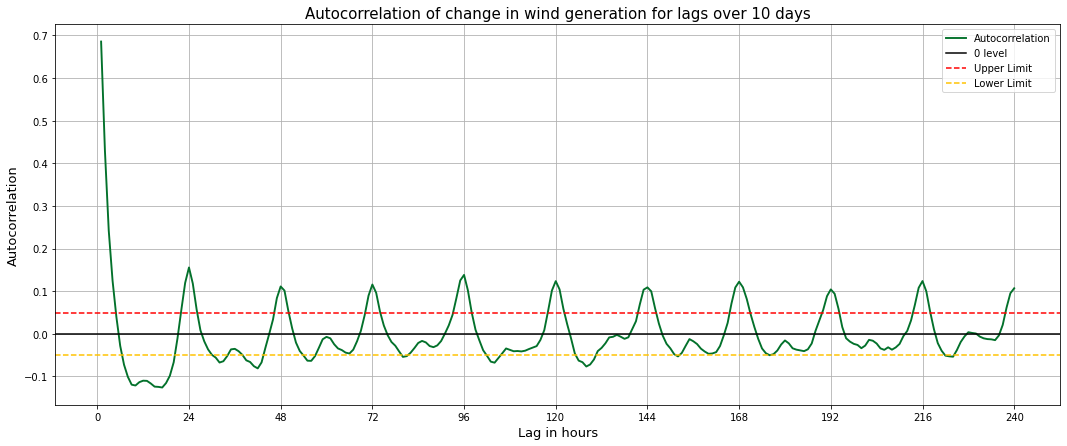

In [42]:
wind_gen_diff = wind_gen['Wind Generation'].diff().dropna()

# Here we are calculating the change in wind generation by taking the difference of two consecutive values in the dataframe

lags = np.arange(1, 241, 1)
autocorrs = [wind_gen_diff.autocorr(lag=lag) for lag in lags]
# print(autocorrs)

# For every hour in 10 days we calculate the correlation on the change in wind generation and store it in autocorrs

plt.figure(figsize=(18,7))
plt.plot(lags, autocorrs, linewidth=1.9, label='Autocorrelation', c = "#03712B")
plt.axhline(y=0, color='black', linestyle='-', label = "0 level")
plt.axhline(y=0.05, color='red', linestyle='--', label='Upper Limit')
plt.axhline(y=-0.05, color='#FFC300', linestyle='--', label='Lower Limit')
xticks = np.arange(0, 241, 24)
plt.xticks(xticks)
plt.legend()
plt.title('Autocorrelation of change in wind generation for lags over 10 days', fontsize = 15)
plt.xlabel('Lag in hours', fontsize = 13)
plt.ylabel('Autocorrelation', fontsize = 13)
plt.grid()
plt.show()

# Here we are plotting the change in wind generation for lags over 10 days.
# The black line corresponds to the value of 0 correlation while the red lines corresponds to the value of 0.5 and -0.5 

## Is there any evidence of diurnal seasonality? Might it be more appropriate to model the change in wind generation than the wind generation?
Yes, by looking and comparing both graphs we can say that modeling the change in wind generation rather than the wind generation itself could be more appropriate because we get some values that are statistically more significant and which give us a meaningful interpretation. This tells us that there is some structure in wind generation because we have got a large number of lags (after even days >0.05 and on many odd days < 0.05) which are found to be statistically significant i.e., they are above or below the upper or lower limits.

In [60]:
result = adfuller(wind_gen["Wind Generation"])
result  

# Here we have applied the ADF to our data of wind generation and we have got the critical values and the p value
# The ADF statistic is a measure of how far the sample autocorrelations are from zero and is output by the first element of the result tuple. The p-value 
# is the probability of observing the ADF statistic, given that the null hypothesis is true (i.e., the time series is non-stationary).
# The critical values, on the other hand, represent the critical values for the test statistic at different confidence levels.
# If the test statistic is greater than the critical value, then it indicates that the time series is stationary.

(-9.527934262062026,
 2.9433233985547577e-16,
 26,
 8733,
 {'1%': -3.4310990236088363,
  '5%': -2.8618710185907106,
  '10%': -2.566946196227356},
 98851.78651258105)

## Can the null hypothesis of a random walk be rejected? Is there evidence of either mean-reversion or mean-aversion?
Based on the output, the p-value is very close to 0, which indicates that the null hypothesis can be rejected. The ADF statistic is also significantly lower than the critical values, which suggests that there is evidence of mean-reversion in the wind generation time series. These results indicate that the wind generation time series is not a random walk and that there is evidence of mean-reversion, which suggests that the wind generation returns to its mean value over time.

[0.0, 33.34290788783434, 62.72799852029282, 89.15139400667881, 113.16412788699543, 135.07409323007636, 155.24294278500167, 173.93655053049508, 191.12299542282724, 206.89039509794006, 221.24708637489024, 234.45219212197426, 246.85282246009336, 258.3685870220099, 268.9972551468366, 278.8295461062557, 287.984895432399, 296.5708175574888, 304.4178249034467, 311.5383153129452, 318.038434664891, 323.94518802841, 329.4000683768318, 334.5984599881526]


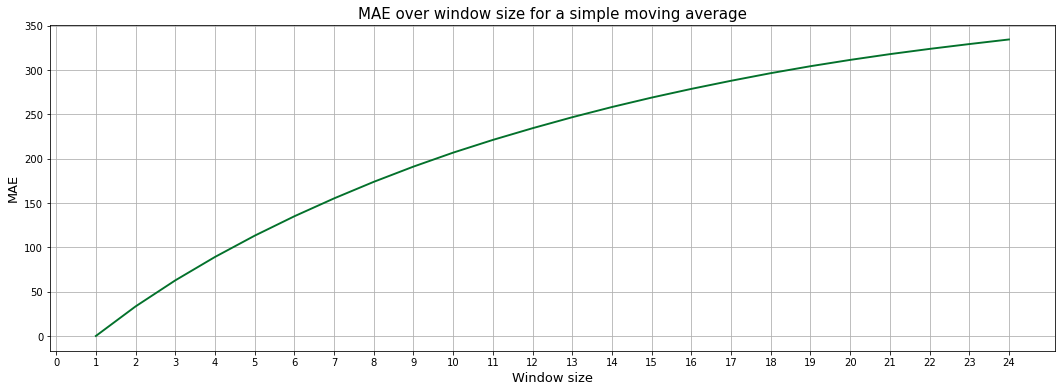

In [35]:
windows = [i for i in range(1,25)]
errors = []
wind_gen['Wind Generation'].dropna()
# Here we are defining windows as a list from 2 to 24. We have not taken the window size as 1 because it always has a 0 error
# After that there is an empty list which will store the errors of each window

for window in windows:
    predictions = wind_gen['Wind Generation'].rolling(window=window).mean()
    predictions = predictions[window:]
    actual = wind_gen['Wind Generation'][window:]
    error = np.mean(np.abs(actual - predictions))
    errors.append(error)

# This for loop iterates over each window value from 2 to 24 and calculates the difference between the initial value
# and the value of window size by which it has been shifted. As the values in the predictions will be nan before the 
# window value so we have not taken them in our analysis. After that we have use the mean absolute error

print(errors)
# print(len(errors))
# plot errors to determine optimal window size
plt.figure(figsize = (18,6))
plt.plot(windows, errors, linewidth=1.9, c = "#03712B")
xticks = np.arange(0, 25, 1)
plt.xticks(xticks)
plt.title('MAE over window size for a simple moving average', fontsize = 15)
plt.xlabel("Window size",  fontsize = 13)
plt.ylabel("MAE",  fontsize = 13)
plt.grid()
plt.show()

# Here we are plotting a curve between the MAE on the y axis and the different window size
# from 2 to 24. And we found out that the error is minimum for a window size of 2

## Is there a simple benchmark that improves on the persistence benchmark?

In [36]:
# Optimal window size
optimal_window = 1

sma_predictions = wind_gen['Wind Generation'].rolling(window=optimal_window).mean()
sma_predictions = sma_predictions[optimal_window:]
actual = wind_gen['Wind Generation'][optimal_window:]
sma_error = np.mean(np.abs(sma_predictions - actual))
print(sma_error)

# Here we are calculating the errors for the simple moving average model with our optimal window size

persistence_predictions = wind_gen['Wind Generation'].shift(1)
persistence_predictions = persistence_predictions[1:]
persistence_error = np.mean(np.abs(persistence_predictions - actual))
print(persistence_error)

# Here we create a shifted version of the wind generation time series with a shift of 1,
# meaning that each value is shifted one step ahead in time. The shift function shifts the
# values of the time series by the specified number of steps. After that we remove the first value 
# of the shifted time series, which is NaN, to keep the same length as the actual values and then
# calculating the MAE for the persistence model

# Compare the errors
if sma_error < persistence_error:
    print("The simple moving average model has a lower prediction error than the persistence benchmark.")
else:
    print("The persistence benchmark has a lower prediction error than the simple moving average model.")

# Here we are comparing the error of our persistence benchmark model and the model with the optimal window size
# and which ever error is smaller, that model becomes better for our analysis 

0.0
66.67860195950522
The simple moving average model has a lower prediction error than the persistence benchmark.


[66.67860195950522, 124.36174635342617, 174.96823964409117, 219.68917023336067, 259.6871472944953, 295.7393276860072, 327.82494853916444, 356.58773703876903, 382.3565849118165, 405.4286256643779, 425.80430615651, 444.1134287338028, 460.3295615140398, 475.1678452507782, 488.93291876081264, 501.0761064230679, 511.4598735632284, 520.4096859486739, 527.8908791400647, 534.12548908047, 539.5320488114552, 544.6251401422873, 550.5446920640159, 557.7040721798658]
[2.067297140184325, 3.85569995515056, 5.424698941033396, 6.81122249126808, 8.05131603194938, 9.169074461648389, 10.163854050324437, 11.055612855421623, 11.854547805289778, 12.569871199366833, 13.201596892060207, 13.769251216401152, 14.272014680785015, 14.73205944226385, 15.158830494227466, 15.535316749025482, 15.857254094475984, 16.13473324079723, 16.36667945495333, 16.559976718561106, 16.727601190905165, 16.88550691828261, 17.06903615253971, 17.291004904193766]


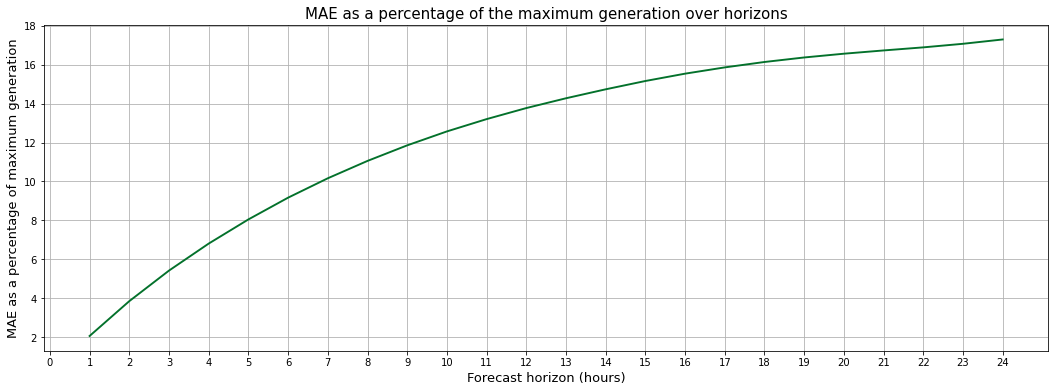

In [37]:
horizons = [i for i in range(1,25)]
mae = []
max_gen = wind_gen['Wind Generation'].max()

# Here we have defined the horizons from 1 to 24 and defined an empty list for storing the mae losses
# and then we find the maximum value in the wind generation dataframe

# calculate MAE for each horizon
for horizon in horizons:
    forecast = wind_gen['Wind Generation'].shift(periods=-horizon)
    actual = wind_gen['Wind Generation']
    mae_horizon = np.mean(np.abs(forecast[:-horizon] - actual[:-horizon]))
    mae.append(mae_horizon)
print(mae)
# print(len(mae))

# Here we are looping on th entire horizons from 1 to 24 and shifting our values and storing the shifted values in forecast.
# and we are subtracting the actual values from the forecaasted values and finding the mae loss 

mae = [x / max_gen * 100 for x in mae]
print(mae)

# Here we are finding the MAE as a percentage of maximum generation and printing its values

plt.figure(figsize = (18,6))
plt.plot(horizons, mae, linewidth=1.9, c = "#03712B")
plt.xlabel("Forecast horizon (hours)", fontsize = 13)
plt.ylabel("MAE as a percentage of maximum generation", fontsize = 13)
plt.title('MAE as a percentage of the maximum generation over horizons', fontsize = 15)
xticks = np.arange(0, 25, 1)
plt.xticks(xticks)
plt.grid()
plt.show()

# Here we are plotting the graph for mae loss as the % of maximum generation over the horizons 

In [58]:
warnings.filterwarnings("ignore")
best_aic, best_bic = float("inf"), float("inf")
best_p, best_d, best_q = None, None, None

# Here we are using warning and filtering on them and ignoring them.
# best aic and best bic are defined to be infinite and best p best q and best d as none

for p in range(1, 5):
  for d in range(1,2):
    for q in range(1, 5):
      model = ARIMA(wind_gen['Wind Generation'],order=(p,d,q))
      model_fit = model.fit()
        
      if model_fit.aic < best_aic:
        best_aic = model_fit.aic
        best_p = p
            
      if model_fit.bic < best_bic:
        best_bic = model_fit.bic
        best_q = q

 # Here we have looped over the p values from 1 to 4 and we have kept the d value as 1 while q values are from 1 to 4
 # we have passed the data into arima model and we are checking for the minimum value of the aic and bic coming from our model 
 # the p value corresponding to the min aic and bic would give the best parameteres for our model. 

print("Best BIC Value",best_bic)
print("Best AIC Value",best_aic) 
print("Best P value =", best_p)
print("Best Q value =", best_q)

# here we are printing the best aic, best bic and the best p and best q values for our model.

Best BIC Value 99456.00367991868
Best AIC Value 99420.61449480786
Best P value = 3
Best Q value = 1
